In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

from scipy.stats import linregress

In [2]:
file = "../Cleaned_Data/Cleaned_Twitch_Data_without_time.csv"
file1 = "../Data/Twitch_global_data.csv"
file2 = "../Cleaned_Data/Cleaned_Twitch_Data.csv"

In [3]:
twitch_game = pd.read_csv(file)
twitch_time = pd.read_csv(file1)
twitch_merged = pd.read_csv(file2)
len(twitch_game)

386

In [4]:
twitch_game.nunique()

Name                386
Hours_watched       386
Peak_viewers        386
Peak_channels       225
Streamers           360
Avg_viewers         357
Avg_channels        165
Avg_viewer_ratio    386
NA_Sales            236
Global_Sales        304
dtype: int64

In [5]:
twitch_game.head()

,Name,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
0,7 Days to Die,53420415,734970,14165,461557,72976,6495,745.27,0.07,0.19
1,APB Reloaded,277614,17386,37,1073,399,15,25.83,0.02,0.04
2,Alien: Isolation,6969074,266707,1980,71724,9490,446,426.90,0.83,2.39
3,Animal Crossing: New Leaf,117314,13805,16,160,163,1,83.86,2.03,9.16
4,Ape Escape,466182,301396,19,118,626,0,1655.03,0.71,1.67


In [6]:
twitch_time.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"


In [7]:
twitch_merged.head() 

,Unnamed: 0,Rank,Name,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
0,0,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,11.28,24.16
1,1,6,Minecraft,2,2016,8965231,440549 hours,68098,1441,77621,12899,633,20.35,11.28,24.16
2,2,7,Minecraft,3,2016,10030905,448411 hours,90527,1438,78524,13500,603,22.37,11.28,24.16
3,3,8,Minecraft,4,2016,7605339,416176 hours,61290,1398,72014,10577,578,18.27,11.28,24.16
4,4,9,Minecraft,5,2016,6848639,407008 hours,41069,1215,77629,9217,547,16.83,11.28,24.16


In [8]:
# Potential questions for analysis 
# Games with most streamers 
# Games with most channels 
# Is there a correlation between games with most streamers and games with most viwers? 
# Is there a change in quantity of streamers by game over time? 
# How have the number of games streamed changed over time? 

In [9]:
#twitch_game["Hours_Streamed"].max() # how do i convert this? 
# get rid of hours and space
hours = "5 hours" 
hours.replace(" hours", "")
hours

twitch_merged["Hours_Streamed"] = twitch_merged["Hours_Streamed"].apply(lambda x: int(x.split(" ")[0]))                               

# convert to integer 



In [10]:
twitch_merged.head()

# twitched_merged df2.transpose() // then you could merge on name // 

,Unnamed: 0,Rank,Name,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
0,0,6,Minecraft,1,2016,10231056,490002,64432,1538,88820,13769,659,20.88,11.28,24.16
1,1,6,Minecraft,2,2016,8965231,440549,68098,1441,77621,12899,633,20.35,11.28,24.16
2,2,7,Minecraft,3,2016,10030905,448411,90527,1438,78524,13500,603,22.37,11.28,24.16
3,3,8,Minecraft,4,2016,7605339,416176,61290,1398,72014,10577,578,18.27,11.28,24.16
4,4,9,Minecraft,5,2016,6848639,407008,41069,1215,77629,9217,547,16.83,11.28,24.16


In [11]:
len(twitch_merged)

3593

In [12]:
# "hello my name is".replace(" ", "||")

In [13]:
twitch_merged["Hours_Streamed"].max()

3591863

In [14]:
twitch_merged["Avg_channels"].max()

5252

In [15]:
twitch_game["Streamers"].max()

8318936

In [16]:
twitch_time["Streams"].max()

25614207

In [17]:
twitch_time["Games_streamed"].max() 


twitch_time["Games_streamed"] = twitch_time["Games_streamed"].apply(lambda x: pd.to_numeric(x.replace(",", "")))

# how do you turn this into a numeric value? 

In [18]:
twitch_time.dtypes

year              int64
Month             int64
Hours_watched     int64
Avg_viewers       int64
Peak_viewers      int64
Streams           int64
Avg_channels      int64
Games_streamed    int64
dtype: object

In [19]:
twitch_time["Games_streamed"].max() 

36960

In [20]:
# How have games streamed changed over time? Are there months that tend to be busier than others? 

In [21]:
game_group = twitch_merged.groupby(["Name"])
game_max_streamers = game_group["Streamers"].max()
game_group["Streamers"].mean()

avg_streamers = game_group["Streamers"].mean().to_frame("avg_streamers")
sample_streamers = avg_streamers.sample(5)

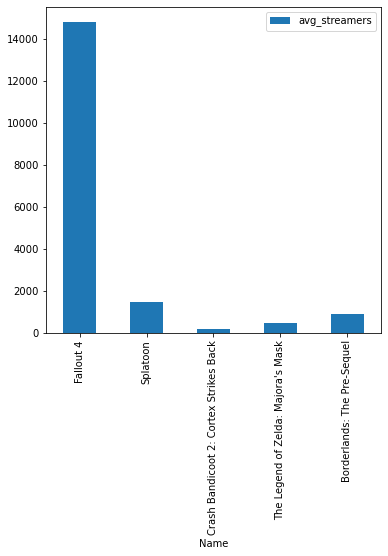

In [22]:
# Sample of 5 random games and streamer count 
sample_streamers.plot(kind="bar", xlabel= "Name", figsize = (6,6))

plt.savefig("../Carter_folder/output_data/streamers_random.png")

plt.show()

In [23]:
asc_game_group = game_group["Streamers"].mean().sort_values(ascending= False)

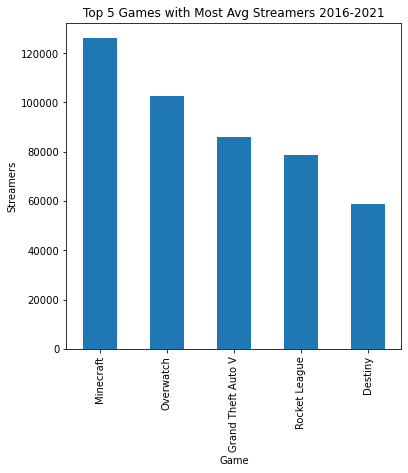

In [24]:
# Top 5 top avg streamers 
asc_game_group.head(5).plot(kind="bar", xlabel= "Name", figsize = (6,6))

plt.title("Top 5 Games with Most Avg Streamers 2016-2021")
plt.xlabel("Game")
plt.ylabel("Streamers")

plt.savefig("../Carter_folder/output_data/top5_streamed_games.png")

plt.show()

In [25]:
round(game_group["Streamers"].mean(), 2)

Name
7 Days to Die                      6993.29
APB Reloaded                       1073.00
Alien: Isolation                   3984.67
Animal Crossing: New Leaf           160.00
Ape Escape                           59.00
                                    ...   
Yakuza Kiwami                       419.00
Ys VIII: Lacrimosa of Dana          143.00
Yu-Gi-Oh! Forbidden Memories        257.00
Zelda II: The Adventure of Link     100.00
Zero Escape: Zero Time Dilemma      401.00
Name: Streamers, Length: 386, dtype: float64

In [26]:
minecraft = twitch_merged.loc[twitch_merged["Name"]=="Minecraft", :]
minecraft

,Unnamed: 0,Rank,Name,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
0,0,6,Minecraft,1,2016,10231056,490002,64432,1538,88820,13769,659,20.88,11.28,24.16
1,1,6,Minecraft,2,2016,8965231,440549,68098,1441,77621,12899,633,20.35,11.28,24.16
2,2,7,Minecraft,3,2016,10030905,448411,90527,1438,78524,13500,603,22.37,11.28,24.16
3,3,8,Minecraft,4,2016,7605339,416176,61290,1398,72014,10577,578,18.27,11.28,24.16
4,4,9,Minecraft,5,2016,6848639,407008,41069,1215,77629,9217,547,16.83,11.28,24.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,5,Minecraft,2,2021,82415310,3524597,647145,9853,450593,122824,5252,23.38,11.28,24.16
62,62,6,Minecraft,3,2021,87784445,3419021,663533,9509,441025,118148,4601,25.68,11.28,24.16
63,63,7,Minecraft,4,2021,79728626,3112654,749947,8863,405918,110888,4329,25.61,11.28,24.16
64,64,7,Minecraft,5,2021,76661535,2829132,964018,7751,357562,103178,3807,27.10,11.28,24.16


In [27]:
minecraft_grouped = minecraft.groupby(["Year"])

In [28]:
minecraft_year = minecraft_grouped.sum()

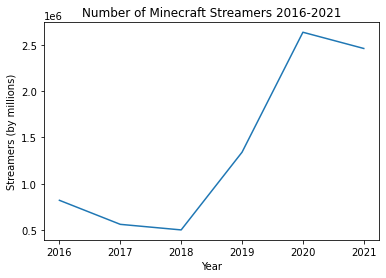

In [29]:
minecraft_year = minecraft_year.reset_index()

x = minecraft_year["Year"]
y = minecraft_year["Streamers"]

plt.plot(x, y)
plt.title("Number of Minecraft Streamers 2016-2021")
plt.xlabel("Year")
plt.ylabel("Streamers (by millions)")

plt.savefig("../Carter_folder//output_data/minecraft_streams_16-21.png")

plt.show()

In [30]:
game_group["Avg_channels"].max()

Name
7 Days to Die                      256
APB Reloaded                        15
Alien: Isolation                    83
Animal Crossing: New Leaf            1
Ape Escape                           0
                                  ... 
Yakuza Kiwami                       18
Ys VIII: Lacrimosa of Dana           4
Yu-Gi-Oh! Forbidden Memories         5
Zelda II: The Adventure of Link      1
Zero Escape: Zero Time Dilemma       5
Name: Avg_channels, Length: 386, dtype: int64

In [31]:
game_group["Global_Sales"].max()

Name
7 Days to Die                      0.19
APB Reloaded                       0.04
Alien: Isolation                   2.39
Animal Crossing: New Leaf          9.16
Ape Escape                         1.67
                                   ... 
Yakuza Kiwami                      0.28
Ys VIII: Lacrimosa of Dana         0.09
Yu-Gi-Oh! Forbidden Memories       1.88
Zelda II: The Adventure of Link    4.38
Zero Escape: Zero Time Dilemma     0.14
Name: Global_Sales, Length: 386, dtype: float64

In [32]:
twitch_game["NA_Sales"].max()

32.48

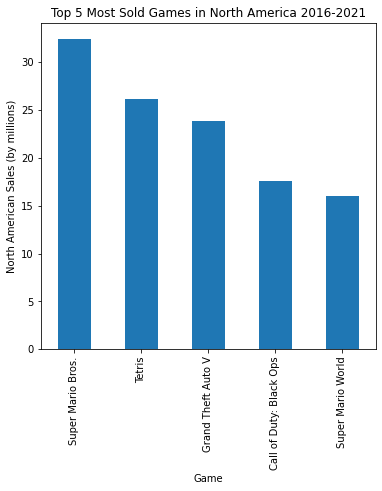

In [33]:
asc_avg_NA = game_group["NA_Sales"].mean().sort_values(ascending= False)

# Top 5 top avg streamers 
asc_avg_NA.head(5).plot(kind="bar", xlabel= "Name", figsize = (6,6))

plt.title("Top 5 Most Sold Games in North America 2016-2021")
plt.xlabel("Game")
plt.ylabel("North American Sales (by millions)")

plt.savefig("../Carter_folder/output_data/most_soldNA_games.png")

plt.show()

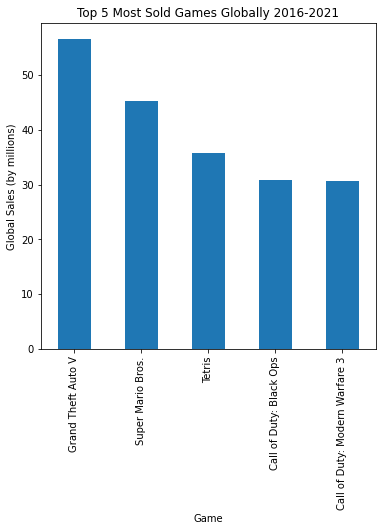

In [34]:
asc_avg_gg = game_group["Global_Sales"].mean().sort_values(ascending= False)

# Top 5 top avg streamers 
asc_avg_gg.head(5).plot(kind="bar", xlabel= "Name", figsize = (6,6))

plt.title("Top 5 Most Sold Games Globally 2016-2021")
plt.xlabel("Game")
plt.ylabel("Global Sales (by millions)")

plt.savefig("../Carter_folder/output_data/most_soldGlobal_games.png")

plt.show()

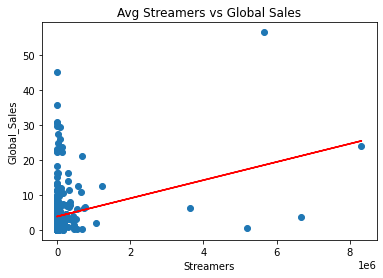

In [35]:
x = twitch_game["Streamers"]
y = twitch_game["Global_Sales"]

twitch_game.plot(kind= "scatter", x = "Streamers", y = "Global_Sales")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title('Avg Streamers vs Global Sales')

plt.savefig("../Carter_folder/output_data/streamersVglobalsales.png")


plt.show()

In [36]:
print(slope)

2.6010753601621144e-06


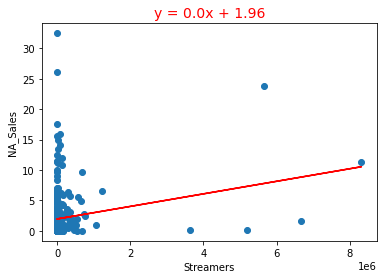

In [37]:
x = twitch_game["Streamers"]
y = twitch_game["NA_Sales"]

twitch_game.plot(kind= "scatter", x = "Streamers", y = "NA_Sales")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)

plt.savefig("../Carter_folder/output_data/streamersVNAsales.png")

plt.show()

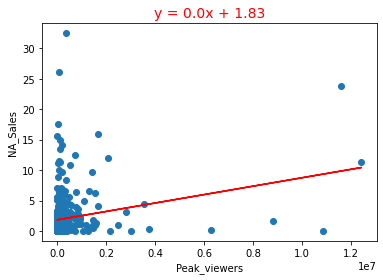

In [38]:
x = twitch_game["Peak_viewers"]
y = twitch_game["NA_Sales"]

twitch_game.plot(kind= "scatter", x = "Peak_viewers", y = "NA_Sales")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)

plt.savefig("../Carter_folder/output_data/peakviewersVNAsales.png")

plt.show()

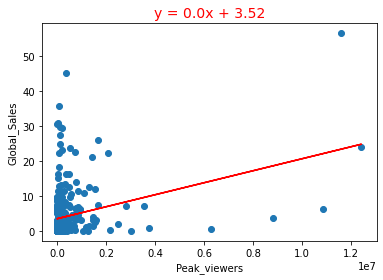

In [39]:
x = twitch_game["Peak_viewers"]
y = twitch_game["Global_Sales"]

twitch_game.plot(kind= "scatter", x = "Peak_viewers", y = "Global_Sales")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)

plt.savefig("../Carter_folder/output_data/peakviewersVGlobalSales.png")

plt.show()

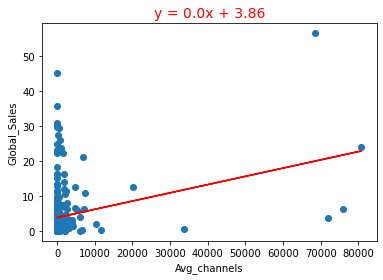

In [40]:
x = twitch_game["Avg_channels"]
y = twitch_game["Global_Sales"]


twitch_game.plot(kind= "scatter", x = "Avg_channels", y = "Global_Sales")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title('Average Channel Count vs. Global Sales')

plt.savefig("../Carter_folder/output_data/AvgChannelsVGlobalSales.png")

plt.show()

In [41]:
print(rvalue)

0.2818453484311105


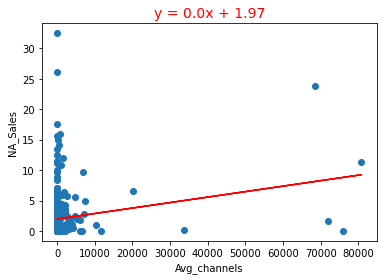

In [42]:
x = twitch_game["Avg_channels"]
y = twitch_game["NA_Sales"]

twitch_game.plot(kind= "scatter", x = "Avg_channels", y = "NA_Sales")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)

plt.savefig("../Carter_folder/output_data/AvgChannelsVNASales.png")

plt.show()

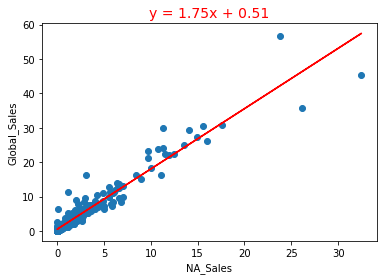

In [43]:
x = twitch_game["NA_Sales"]
y = twitch_game["Global_Sales"]

twitch_game.plot(kind= "scatter", x = "NA_Sales", y = "Global_Sales")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)

plt.savefig("../Carter_folder/output_data/GlobalSalesVNASales.png")

plt.show()